In [4]:
#from scipy.spatial import distance as dist
import numpy as np
from imutils.video import VideoStream
from imutils import face_utils
from threading import Thread
import numpy as np
#import playsound
import argparse
import imutils
import time
import dlib
import cv2
from matplotlib import pyplot as plt
import matplotlib.pyplot as plot

In [2]:
!pip install playsound

In [6]:
def sound_alarm(path):
	# play an alarm sound
	playsound.playsound(path)

In [5]:
def eye_aspect_ratio(eye):
	# compute the euclidean distances between the two sets of
	# vertical eye landmarks (x, y)-coordinates
	A = np.linalg.norm(eye[1]- eye[5])
	B = np.linalg.norm(eye[2]- eye[4])
 
	# compute the euclidean distance between the horizontal
	# eye landmark (x, y)-coordinates
	C = np.linalg.norm(eye[0] - eye[3])
 
	# compute the eye aspect ratio
	ear = (A + B) / (2.0 * C)
 
	# return the eye aspect ratio
	return ear

In [7]:
# define two constants, one for the eye aspect ratio to indicate
# blink and then a second constant for the number of consecutive
# frames the eye must be below the threshold for to set off the
# alarm
EYE_AR_THRESH = 0.3
EYE_AR_CONSEC_FRAMES = 48
 
# initialize the frame counter as well as a boolean used to
# indicate if the alarm is going off
COUNTER = 0
ALARM_ON = False

In [9]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
print("[INFO] loading facial landmark predictor...")
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('E:\\CodePython\\shape_predictor_68_face_landmarks.dat')

[INFO] loading facial landmark predictor...


In [10]:
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

[INFO] starting video stream thread...


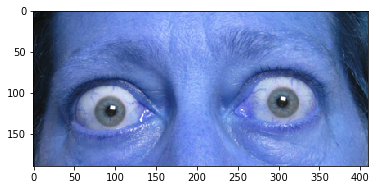

In [17]:
print("[INFO] starting video stream thread...")
frame = cv2.imread('eye1.jpg')
plt.imshow(frame)
plt.show()
frame = imutils.resize(frame, width=450)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
# detect faces in the grayscale frame
rects = detector(gray, 0)

In [18]:
for rect in rects:
	# determine the facial landmarks for the face region, then
	# convert the facial landmark (x, y)-coordinates to a NumPy
	# array
	shape = predictor(gray, rect)
	shape = face_utils.shape_to_np(shape)

	# extract the left and right eye coordinates, then use the
	# coordinates to compute the eye aspect ratio for both eyes
	leftEye = shape[lStart:lEnd]
	rightEye = shape[rStart:rEnd]
	leftEAR = eye_aspect_ratio(leftEye)
	rightEAR = eye_aspect_ratio(rightEye)

	# average the eye aspect ratio together for both eyes
	ear = (leftEAR + rightEAR) / 2.0
	leftEyeHull = cv2.convexHull(leftEye)
	rightEyeHull = cv2.convexHull(rightEye)
	cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
	cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)
	if ear < EYE_AR_THRESH:
		COUNTER += 1

		# if the eyes were closed for a sufficient number of
		# then sound the alarm
		if COUNTER >= EYE_AR_CONSEC_FRAMES:
			# if the alarm is not on, turn it on
			if not ALARM_ON:
				ALARM_ON = True

				# check to see if an alarm file was supplied,
				# and if so, start a thread to have the alarm
				# sound played in the background
				if args["alarm"] != "":
					t = Thread(target=sound_alarm,
						args=(args["alarm"],))
					t.deamon = True
					t.start()

			# draw an alarm on the frame
			cv2.putText(frame, "DROWSINESS ALERT!", (10, 30),
				cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

	# otherwise, the eye aspect ratio is not below the blink
	# threshold, so reset the counter and alarm
	else:
		COUNTER = 0
		ALARM_ON = False
		cv2.putText(frame, "EAR: {:.2f}".format(ear), (300, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

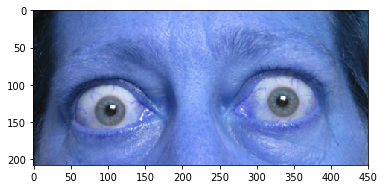

In [19]:
plt.imshow(frame)
plt.show()

In [20]:
def rect_to_bb(rect):
	# take a bounding predicted by dlib and convert it
	# to the format (x, y, w, h) as we would normally do
	# with OpenCV
	x = rect.left()
	y = rect.top()
	w = rect.right() - x
	h = rect.bottom() - y
 
	# return a tuple of (x, y, w, h)
	return (x, y, w, h)
def shape_to_np(shape, dtype="int"):
	# initialize the list of (x, y)-coordinates
	coords = np.zeros((68, 2), dtype=dtype)
 
	# loop over the 68 facial landmarks and convert them
	# to a 2-tuple of (x, y)-coordinates
	for i in range(0, 68):
		coords[i] = (shape.part(i).x, shape.part(i).y)
 
	# return the list of (x, y)-coordinates
	return coords

In [21]:
# import the necessary packages
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2
 

In [23]:
image = cv2.imread("eye1.jpg")
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# detect faces in the grayscale image
rects = detector(gray, 1)
print (rects)

In [25]:
for (i, rect) in enumerate(rects):
	# determine the facial landmarks for the face region, then
	# convert the facial landmark (x, y)-coordinates to a NumPy
	print (rect)
	shape = predictor(gray, rect)
	shape = face_utils.shape_to_np(shape)
 
	print (shape)
	# [i.e., (x, y, w, h)], then draw the face bounding box
	(x, y, w, h) = face_utils.rect_to_bb(rect)
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
 
	# show the face number
	cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
 
	# loop over the (x, y)-coordinates for the facial landmarks
	# and draw them on the image
	for (x, y) in shape:
		cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
 
# show the output image with the face detections + facial landmarks
cv2.imshow("Output", image)
cv2.waitKey(0)

KeyboardInterrupt: 

In [54]:
#import scipy.misc
import dlib
import numpy as np

try:
    import face_recognition_models
except:
    print("Please install `face_recognition_models` with this command before using `face_recognition`:")
    print()
    print("pip install git+https://github.com/ageitgey/face_recognition_models")
    quit()
predictor_model = 'C:\Users\OR-PC\Desktop\CodePython\shape_predictor_68_face_landmarks.dat'
face_recognition_model = 'C:\Users\OR-PC\Desktop\CodePython\dlib_face_recognition_resnet_model_v1.dat'
face_detector = dlib.get_frontal_face_detector()

predictor_model = face_recognition_models.pose_predictor_model_location()
pose_predictor = dlib.shape_predictor(predictor_model)

face_recognition_model = face_recognition_models.face_recognition_model_location()
face_encoder = dlib.face_recognition_model_v1(face_recognition_model)


def _rect_to_css(rect):
    """
    Convert a dlib 'rect' object to a plain tuple in (top, right, bottom, left) order

    :param rect: a dlib 'rect' object
    :return: a plain tuple representation of the rect in (top, right, bottom, left) order
    """
    return rect.top(), rect.right(), rect.bottom(), rect.left()


def _css_to_rect(css):
    """
    Convert a tuple in (top, right, bottom, left) order to a dlib `rect` object

    :param css:  plain tuple representation of the rect in (top, right, bottom, left) order
    :return: a dlib `rect` object
    """
    return dlib.rectangle(css[3], css[0], css[1], css[2])


def _trim_css_to_bounds(css, image_shape):
    """
    Make sure a tuple in (top, right, bottom, left) order is within the bounds of the image.

    :param css:  plain tuple representation of the rect in (top, right, bottom, left) order
    :param image_shape: numpy shape of the image array
    :return: a trimmed plain tuple representation of the rect in (top, right, bottom, left) order
    """
    return max(css[0], 0), min(css[1], image_shape[1]), min(css[2], image_shape[0]), max(css[3], 0)


def face_distance(face_encodings, face_to_compare):
    """
    Given a list of face encodings, compare them to a known face encoding and get a euclidean distance
    for each comparison face. The distance tells you how similar the faces are.

    :param faces: List of face encodings to compare
    :param face_to_compare: A face encoding to compare against
    :return: A numpy ndarray with the distance for each face in the same order as the 'faces' array
    """
    if len(face_encodings) == 0:
        return np.empty((0))

    return np.linalg.norm(face_encodings - face_to_compare, axis=1)



def load_image_file(filename, mode='RGB'):
    """
    Loads an image file (.jpg, .png, etc) into a numpy array

    :param filename: image file to load
    :param mode: format to convert the image to. Only 'RGB' (8-bit RGB, 3 channels) and 'L' (black and white) are supported.
    :return: image contents as numpy array
    """
    return scipy.misc.imread(filename, mode=mode)



def _raw_face_locations(img, number_of_times_to_upsample=1):
    """
    Returns an array of bounding boxes of human faces in a image

    :param img: An image (as a numpy array)
    :param number_of_times_to_upsample: How many times to upsample the image looking for faces. Higher numbers find smaller faces.
    :return: A list of dlib 'rect' objects of found face locations
    """
    return face_detector(img, number_of_times_to_upsample)


def face_locations(img, number_of_times_to_upsample=1):
    """
    Returns an array of bounding boxes of human faces in a image

    :param img: An image (as a numpy array)
    :param number_of_times_to_upsample: How many times to upsample the image looking for faces. Higher numbers find smaller faces.
    :return: A list of tuples of found face locations in css (top, right, bottom, left) order
    """
    return [_trim_css_to_bounds(_rect_to_css(face), img.shape) for face in _raw_face_locations(img, number_of_times_to_upsample)]



def _raw_face_landmarks(face_image, face_locations=None):
    if face_locations is None:
        face_locations = _raw_face_locations(face_image)
    else:
        face_locations = [_css_to_rect(face_location) for face_location in face_locations]

    return [pose_predictor(face_image, face_location) for face_location in face_locations]


def face_landmarks(face_image, face_locations=None):
    """
    Given an image, returns a dict of face feature locations (eyes, nose, etc) for each face in the image

    :param face_image: image to search
    :param face_locations: Optionally provide a list of face locations to check.
    :return: A list of dicts of face feature locations (eyes, nose, etc)
    """
    landmarks = _raw_face_landmarks(face_image, face_locations)
    landmarks_as_tuples = [[(p.x, p.y) for p in landmark.parts()] for landmark in landmarks]

    # For a definition of each point index, see https://cdn-images-1.medium.com/max/1600/1*AbEg31EgkbXSQehuNJBlWg.png
    return [{
        "chin": points[0:17],
        "left_eyebrow": points[17:22],
        "right_eyebrow": points[22:27],
        "nose_bridge": points[27:31],
        "nose_tip": points[31:36],
        "left_eye": points[36:42],
        "right_eye": points[42:48],
        "top_lip": points[48:55] + [points[64]] + [points[63]] + [points[62]] + [points[61]] + [points[60]],
        "bottom_lip": points[54:60] + [points[48]] + [points[60]] + [points[67]] + [points[66]] + [points[65]] + [points[64]]
    } for points in landmarks_as_tuples]



def face_encodings(face_image, known_face_locations=None, num_jitters=1):
    """
    Given an image, return the 128-dimension face encoding for each face in the image.

    :param face_image: The image that contains one or more faces
    :param known_face_locations: Optional - the bounding boxes of each face if you already know them.
    :param num_jitters: How many times to re-sample the face when calculating encoding. Higher is more accurate, but slower (i.e. 100 is 100x slower)
    :return: A list of 128-dimentional face encodings (one for each face in the image)
    """
    raw_landmarks = _raw_face_landmarks(face_image, known_face_locations)

    return [np.array(face_encoder.compute_face_descriptor(face_image, raw_landmark_set, num_jitters)) for raw_landmark_set in raw_landmarks]



def compare_faces(known_face_encodings, face_encoding_to_check, tolerance=0.6):
    """
    Compare a list of face encodings against a candidate encoding to see if they match.

    :param known_face_encodings: A list of known face encodings
    :param face_encoding_to_check: A single face encoding to compare against the list
    :param tolerance: How much distance between faces to consider it a match. Lower is more strict. 0.6 is typical best performance.
    :return: A list of True/False values indicating which known_face_encodings match the face encoding to check
    """
    return list(face_distance(known_face_encodings, face_encoding_to_check) <= tolerance)

AttributeError: 'module' object has no attribute 'face_recognition_model_v1'

In [ ]:
import cv2
import numpy as np

## Read Image
image = cv2.imread('eye1.jpg')
imageBackup = image.copy()
## Convert to 1 channel only grayscale image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
## CLAHE Equalization
cl1 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe = cl1.apply(gray)
## medianBlur the image to remove noise
blur = cv2.medianBlur(clahe, 7)

## Detect Circles
circles = cv2.HoughCircles(blur ,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=7,maxRadius=21)

if circles != None:
    for circle in circles[0,:]:
        # draw the outer circle
        cv2.circle(image,(circle[0],circle[1]),circle[2],(0,255,0),2)
        # draw the center of the circle
        cv2.circle(image,(circle[0],circle[1]),2,(0,0,255),3)

cv2.imshow('Final', image)
cv2.imshow('imageBackup', imageBackup)

cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\OR-PC\Anaconda2\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [19]:
import sys
import pygame
pygame.init()

ImportError: DLL load failed: %1 is not a valid Win32 application.